In [1]:
import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-73.71631,46.04137.jpg
/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-74.62281,45.80216.jpg
/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-70.19693,53.61931.jpg
/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-71.15229,46.51529.jpg
/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-71.70749,45.72332.jpg
/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-77.82525,48.13819.jpg
/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-68.12459,53.23771.jpg
/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-66.00647,48.16936.jpg
/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-78.47237,46.8756.jpg
/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-75.76655,45.55576.jpg
/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-77.3906,51.6158.jpg
/kaggle/input/wildfire-prediction-dataset/valid/wildfire/-77.20392,46.92026.jpg
/kaggle/input/wildfire-prediction-dataset/v

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.python.framework import ops
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

2024-05-26 08:58:56.616794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 08:58:56.616920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 08:58:56.859693: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dir = '/kaggle/input/wildfire-prediction-dataset/train'
x = []
y = []
for direct in os.listdir(dir):
    print("Loading dataset training {}".format(direct))
    for filename in os.listdir(os.path.join(dir,direct)):
        img_path = os.path.join(dir,direct,filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32,32))
        img = np.array(img)
        img = img/255
        x.append(img)
        y.append(direct)
        

Loading dataset training wildfire
Loading dataset training nowildfire


Premature end of JPEG file


In [4]:
dir_val = '/kaggle/input/wildfire-prediction-dataset/valid'
x_val=[]
y_val=[]
for direct in os.listdir(dir_val):
    print("Loading dataset validation {}".format(direct))
    for filename in os.listdir(os.path.join(dir_val,direct)):
        img_path = os.path.join(dir_val,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_val.append(image)
        y_val.append(direct)

Loading dataset validation wildfire
Loading dataset validation nowildfire


In [5]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
int_label = le.fit_transform(y)
one_hot = to_categorical(int_label)

In [6]:
print(int_label)

[1 1 1 ... 0 0 0]


In [7]:
print(one_hot)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [8]:
le = LabelEncoder()
int_label = le.fit_transform(y_val)
one_hot_val = to_categorical(int_label)

In [9]:
x = np.array(x)
x_val = np.array(x_val)

In [10]:
from sklearn.utils import shuffle
x,one_hot = shuffle(x,one_hot)
x_val,one_hot_val = shuffle(x_val,one_hot_val)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,one_hot,test_size=0.2)

In [12]:
Y_train = np.array([np.array(i) for i in Y_train])
Y_test = np.array([np.array(i) for i in Y_test])
one_hot_val = np.array([np.array(i) for i in one_hot_val])

In [13]:
from keras import layers
from keras import models
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,068,418 (4.08 MB)

 Trainable params: 1,068,290 (4.08 MB)

 Non-trainable params: 128 (512.00 B)

In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [16]:
history=model.fit(X_train,Y_train,validation_data=(x_val,one_hot_val),batch_size=32,epochs=10)

Epoch 1/10
 43/757 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8500 - loss: 0.6901

I0000 00:00:1716714328.048935      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716714328.067431      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


757/757 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9046 - loss: 0.2904

W0000 00:00:1716714334.163106      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


757/757 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9046 - loss: 0.2904 - val_accuracy: 0.9335 - val_loss: 0.1757
Epoch 2/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9312 - loss: 0.1771 - val_accuracy: 0.9216 - val_loss: 0.2072
Epoch 3/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9454 - loss: 0.1471 - val_accuracy: 0.9284 - val_loss: 0.1941
Epoch 4/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9512 - loss: 0.1243 - val_accuracy: 0.9365 - val_loss: 0.1815
Epoch 5/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9616 - loss: 0.1104 - val_accuracy: 0.9483 - val_loss: 0.1533
Epoch 6/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9677 - loss: 0.0866 - val_accuracy: 0.9421 - val_loss: 0.1629
Epoch 7/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9716 - loss: 0.0741 - val_accuracy: 0.9110 - val_loss: 0.2505
Epoch 8/10
757/757 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9712 - loss: 0.0864 - val_accuracy: 0.8976 - va

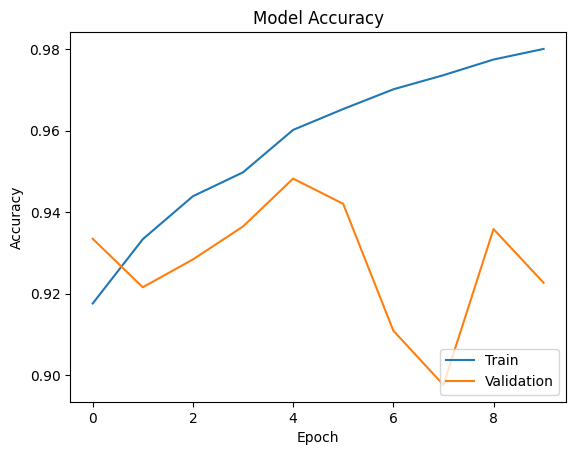

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

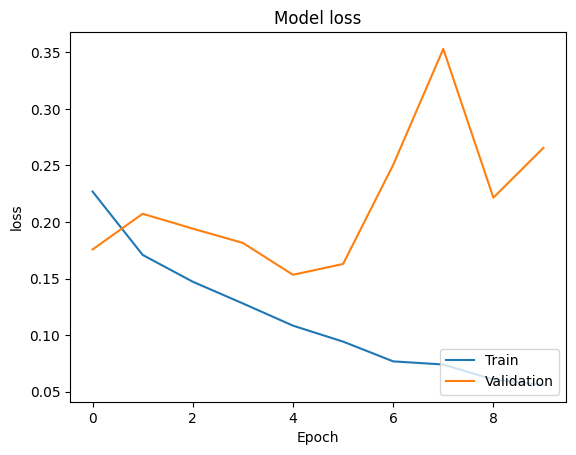

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

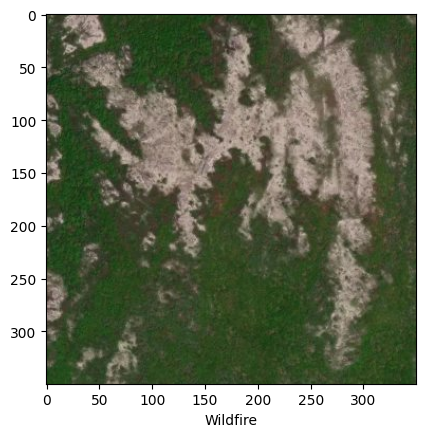

In [19]:
import matplotlib.image as mping
test_img_path = "/kaggle/input/wildfire-prediction-dataset/test/wildfire/-59.03238,51.85132.jpg"
img = mping.imread(test_img_path)
imgplot = plt.imshow(img)
plt.xlabel("Wildfire")
plt.show()

In [20]:
test_arr = []
test_image = cv2.imread(test_img_path)
test_image = cv2.resize(test_image,(32,32))
test_image = np.array(test_image)
test_image = test_image/255
test_image = test_image.reshape(1,32,32,3)
test_arr.append(test_image)

In [21]:
model.predict(test_arr) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


array([[0.00121246, 0.9987876 ]], dtype=float32)